<a href="https://colab.research.google.com/github/27804balaji/Pytorch/blob/main/PyTorch_02_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

**Steps involved :-**

1. Input Image Representation
2. Numerical Encoding
* The image is converted into a matrix of numbers representing pixel intensity values.
* This normalized numerical representation is fed into the model.
3. Processing via a Machine Learning Algorithm
* The numerical input is passed through a Machine Learning Model
4. Actual vs. Predicted Output
* Actual output: The true class labels for the image (e.g., Sushi 🍣, Steak 🥩, Pizza 🍕).
* Predicted output: The model assigns probability scores to each class.
5. Learning from Many Examples
* [0.97, 0.00, 0.03] → Correctly classified as Sushi 🍣 (✅)
* [0.81, 0.14, 0.05] → Incorrect classification (❌)
* [0.03, 0.07, 0.90] → Correctly classified as Pizza 🍕 (✅)


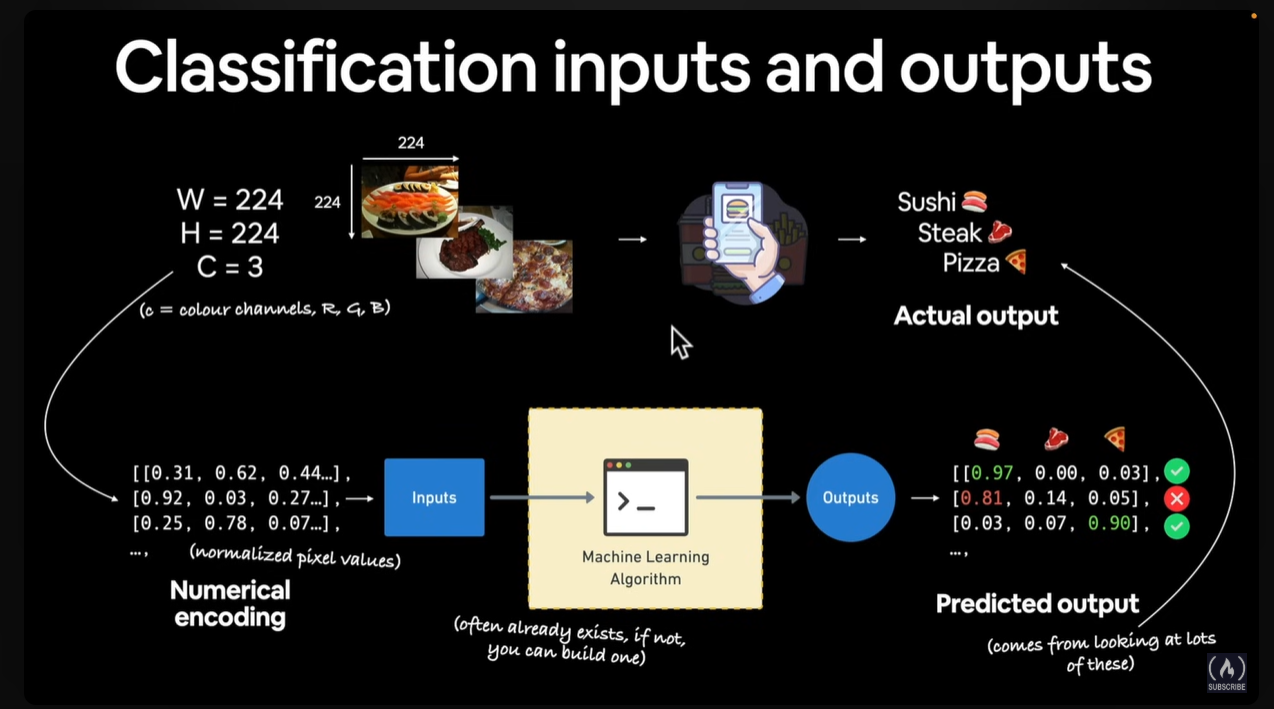

## Binary Classification

In [ ]:
# Making Data.

import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(x), len(y)

(1000, 1000)

In [ ]:
x[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd

circles = pd.DataFrame({'X1':x[:,0],
                        'X2':x[:,1],
                        'Label':y})

circles

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles.Label.value_counts()

,count
Label,
1,500
0,500


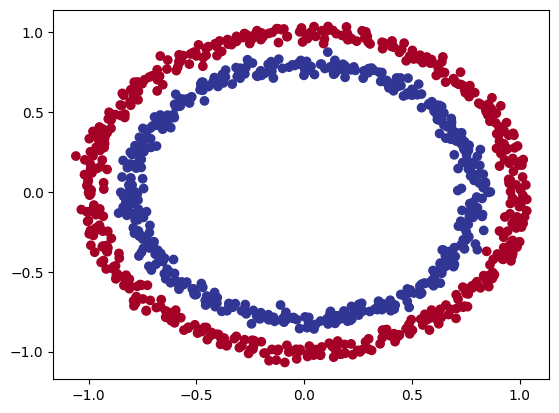

In [ ]:
# Visualize.

import matplotlib.pyplot as plt

plt.scatter(x = x[:,0],
            y = x[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [ ]:
# Check input and output shape.

x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Turn the data into tensors and create train and test splits.

import torch

torch.__version__

'2.6.0+cu124'

In [ ]:
x.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
x = torch.from_numpy(x).type(torch.float)
x, x.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 torch.float32)

In [ ]:
y = torch.from_numpy(y).type(torch.float)
y[:5], y.dtype

(tensor([1., 1., 1., 1., 0.]), torch.float32)

In [ ]:
# Split the data into train and test.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
len(x_train), len(y_train), len(x_test), len(y_test)

(800, 800, 200, 200)

## Build Classification model

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape # Shapes.

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [ ]:
# Build a model.

class circlesModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # 5 refers to the nodes or neurons in the next layer.
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # Here 5 refers to, from  the 5 neurons of the present layer it produce one output layer.

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [ ]:
model = circlesModel()
model

circlesModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-3.7837e-01,  3.7007e-01],
         [-3.5848e-01,  2.6133e-01],
         [ 3.9589e-01, -6.9226e-01],
         [ 4.0256e-01,  3.5285e-04],
         [-6.9235e-01, -6.7370e-01]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4416, -0.3991,  0.3727, -0.5829, -0.5787], requires_grad=True),
 Parameter containing:
 tensor([[-0.3524, -0.3824,  0.4254, -0.2167, -0.3146]], requires_grad=True),
 Parameter containing:
 tensor([-0.3322], requires_grad=True)]

In [ ]:
len(list(model.parameters()))

4

In [ ]:
len(x_train), len(y_train)

(800, 800)

In [ ]:
len(x_test), len(y_test)

(200, 200)

In [ ]:
# Let's replicate the above model with nn.Sequential.

model_1 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model

circlesModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6855, -0.1726],
                      [-0.4606,  0.4833],
                      [ 0.6925,  0.2839],
                      [-0.1269,  0.5815],
                      [ 0.6600, -0.2921]])),
             ('0.bias', tensor([ 0.3818,  0.6687,  0.0451,  0.5957, -0.5182])),
             ('1.weight',
              tensor([[-0.1662, -0.3109,  0.1501,  0.2359, -0.0659]])),
             ('1.bias', tensor([-0.3724]))])

In [ ]:
x_test.shape

torch.Size([200, 2])

In [ ]:
# Make predictions.

prediction = model.to(device)(x_test.to(device))
prediction[:10], prediction.shape

(tensor([[-0.2956],
         [-0.1600],
         [-0.1700],
         [-0.3331],
         [ 0.5935],
         [ 0.6704],
         [ 0.4470],
         [ 0.6434],
         [-0.2024],
         [-0.1424]], grad_fn=<SliceBackward0>),
 torch.Size([200, 1]))

Practice the flow of the Neural Network :- [Tensorflow PlayGround](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.50850&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# Make predictions.

with torch.inference_mode():
  prediction = model.to(device)(x_test.to(device))
prediction[:10], prediction.shape

(tensor([[-0.2956],
         [-0.1600],
         [-0.1700],
         [-0.3331],
         [ 0.5935],
         [ 0.6704],
         [ 0.4470],
         [ 0.6434],
         [-0.2024],
         [-0.1424]]),
 torch.Size([200, 1]))

## Loss Function and Optimizers.

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLOgitsLoos is equal to Sigmoid activation function.
optimizer =  torch.optim.SGD(params = model.parameters(),
                             lr = 0.1)

In [ ]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Train our Model

To train our model, we ned to set training loop:

1. Forward pass.
2. Calculate pass.
3. OPtimize zero grad.
4. Loss backward(Backpropagation)
5. Optimizer step(Gradient descent)

* Our model produces raw **logits( logits refer to the raw, unnormalized outputs of a neural network before applying an activation function like softmax or sigmoid. ex:- [2.5, -1.2, 0.8])** .
* we are going to convert them into prediction probablities by passing them into some activations(ex:- sigmoid for binary cross entrophy and softmax for multi label class classification).

Then we can convert the model prediction probablaties to prediction labels by rounding them or `argmax()`

In [ ]:
y_logits = model(x_test.to(device))[:5]
y_logits

tensor([[-0.2956],
        [-0.1600],
        [-0.1700],
        [-0.3331],
        [ 0.5935]], grad_fn=<SliceBackward0>)

In [ ]:
with torch.inference_mode():
  y_logits = model(x_test.to(device))[:5]
y_logits

tensor([[-0.2956],
        [-0.1600],
        [-0.1700],
        [-0.3331],
        [ 0.5935]])

In [ ]:
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4266],
        [0.4601],
        [0.4576],
        [0.4175],
        [0.6442]])

## For our prediction probablities, we need to perform range-sytle rounding on them :-

* `y_pred_prob` >= 0.5, `y = 1` (class 1)
* `y_pred_prob` < 0.5, `y = 1` (class 0)

In [ ]:
y_pred = torch.round(y_pred_prob)

# In full (logits -> pred prob -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model(x_test.to(device))[:5]))

y_pred

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])

In [ ]:
y_pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], grad_fn=<RoundBackward0>)

In [ ]:
torch.eq(y_pred.squeeze(), y_pred_labels.squeeze())

tensor([True, True, True, True, True])

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Building the training and testing loop.

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = x_train.to(device), y_train.to(device)
X_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()

# Training.
  # Front Propagation.
  y_logits = model(X_train).to(device).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turns logits -> pred -> pred labels


  loss = loss_fn(y_logits, y_train)

  acc = accuracy(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()

  # Back Propagation.
  loss.backward()
  optimizer.step()
  model.eval()

# Testing.
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)

    test_acc = accuracy(y_true = y_test, y_pred = test_pred)

    if epoch % 10 == 0:
      print(f"Epoch :{epoch} | Loss :{loss:.5f} | Accuracy :{acc:.2f}% | Test Loss :{test_loss:.5f} | Test Accuracy :{test_acc:.2f}%")

Epoch :0 | Loss :0.71753 | Accuracy :49.75% | Test Loss :0.71276 | Test Accuracy :53.50%
Epoch :10 | Loss :0.70928 | Accuracy :49.62% | Test Loss :0.70639 | Test Accuracy :53.50%
Epoch :20 | Loss :0.70464 | Accuracy :49.88% | Test Loss :0.70286 | Test Accuracy :49.50%
Epoch :30 | Loss :0.70162 | Accuracy :50.12% | Test Loss :0.70061 | Test Accuracy :50.00%
Epoch :40 | Loss :0.69952 | Accuracy :50.00% | Test Loss :0.69906 | Test Accuracy :49.00%
Epoch :50 | Loss :0.69798 | Accuracy :50.00% | Test Loss :0.69795 | Test Accuracy :49.00%
Epoch :60 | Loss :0.69685 | Accuracy :49.62% | Test Loss :0.69715 | Test Accuracy :51.50%
Epoch :70 | Loss :0.69598 | Accuracy :49.75% | Test Loss :0.69655 | Test Accuracy :51.50%
Epoch :80 | Loss :0.69533 | Accuracy :49.75% | Test Loss :0.69611 | Test Accuracy :51.00%
Epoch :90 | Loss :0.69482 | Accuracy :49.62% | Test Loss :0.69578 | Test Accuracy :51.00%


In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('File is already exist!')

else:
  print('downloading....')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

downloading....


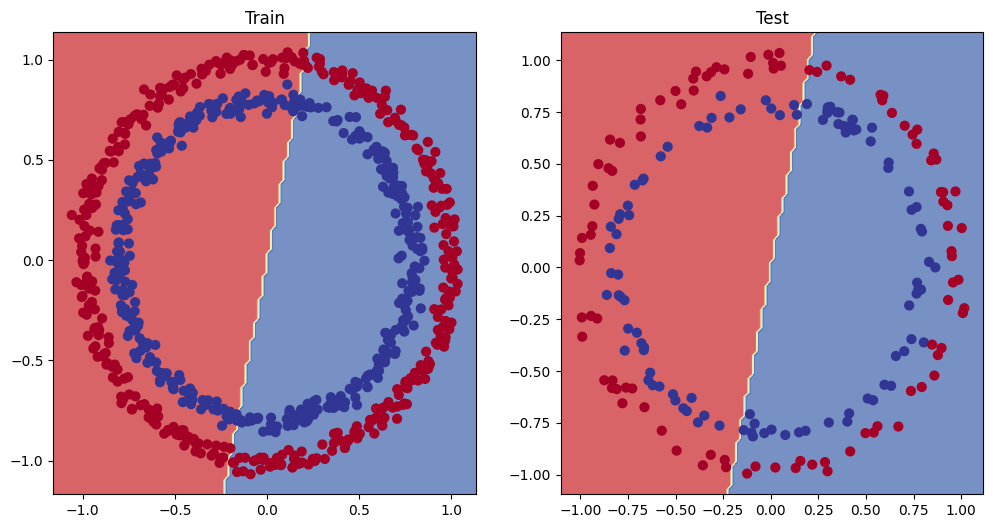

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

## Improving Model performance.

* Add more layers
* add more hidden nodes.
* Fit for longer.
* Changing activation function.
* Changing learning rate.
* Change loss function.




In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):

    # return self.layer_3(self.layer_2(self.layer_1(x)))
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z

model_V1 = CircleModelV1().to(device)
model_V1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_V1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
loss_fn_1 = nn.BCEWithLogitsLoss()
optimizer_1 = torch.optim.SGD(params = model_V1.parameters(),
                            lr = 0.1)

In [ ]:
# Building the training and testing loop.

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = x_train.to(device), y_train.to(device)
X_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_V1.to(device).train()

# Training.
  # Front Propagation.
  y_logits = model_V1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turns logits -> pred -> pred labels


  loss = loss_fn_1(y_logits, y_train)

  acc = accuracy(y_true = y_train, y_pred = y_pred)
  optimizer_1.zero_grad()

  # Back Propagation.
  loss.backward()
  optimizer_1.step()
  model_V1.eval()

# Testing.
  with torch.inference_mode():
    test_logits = model_V1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn_1(test_logits, y_test)

    test_acc = accuracy(y_true = y_test, y_pred = test_pred)

    if epoch % 100 == 0:
      print(f"Epoch :{epoch} | Loss :{loss:.5f} | Accuracy :{acc:.2f}% | Test Loss :{test_loss:.5f} | Test Accuracy :{test_acc:.2f}%")

Epoch :0 | Loss :0.69396 | Accuracy :50.88% | Test Loss :0.69261 | Test Accuracy :51.00%
Epoch :100 | Loss :0.69305 | Accuracy :50.38% | Test Loss :0.69379 | Test Accuracy :48.00%
Epoch :200 | Loss :0.69299 | Accuracy :51.12% | Test Loss :0.69437 | Test Accuracy :46.00%
Epoch :300 | Loss :0.69298 | Accuracy :51.62% | Test Loss :0.69458 | Test Accuracy :45.00%
Epoch :400 | Loss :0.69298 | Accuracy :51.12% | Test Loss :0.69465 | Test Accuracy :46.00%
Epoch :500 | Loss :0.69298 | Accuracy :51.00% | Test Loss :0.69467 | Test Accuracy :46.00%
Epoch :600 | Loss :0.69298 | Accuracy :51.00% | Test Loss :0.69468 | Test Accuracy :46.00%
Epoch :700 | Loss :0.69298 | Accuracy :51.00% | Test Loss :0.69468 | Test Accuracy :46.00%
Epoch :800 | Loss :0.69298 | Accuracy :51.00% | Test Loss :0.69468 | Test Accuracy :46.00%
Epoch :900 | Loss :0.69298 | Accuracy :51.00% | Test Loss :0.69468 | Test Accuracy :46.00%


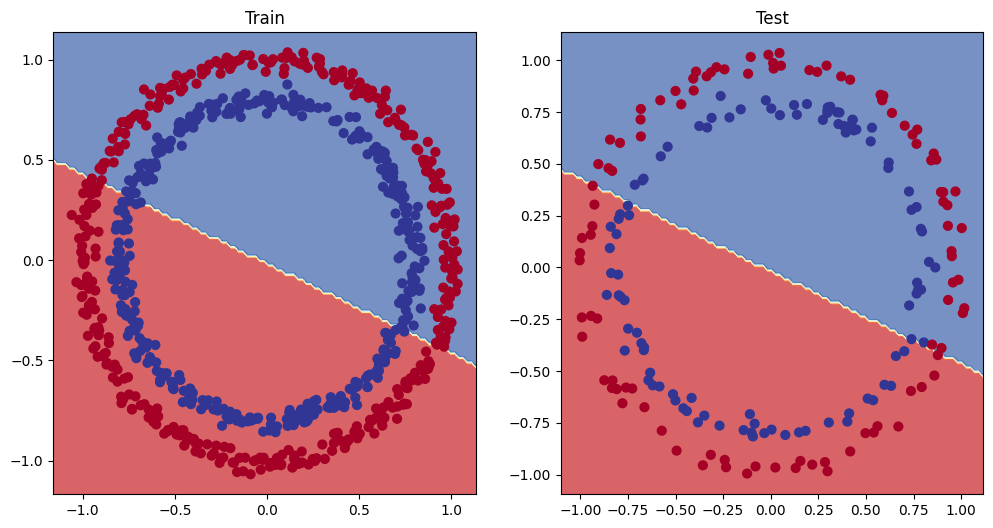

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_V1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_V1, X_test, y_test)

## Building model with `Non-Linear` activation functions.

In [ ]:
# Making Data.

import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(x), len(y)

(1000, 1000)

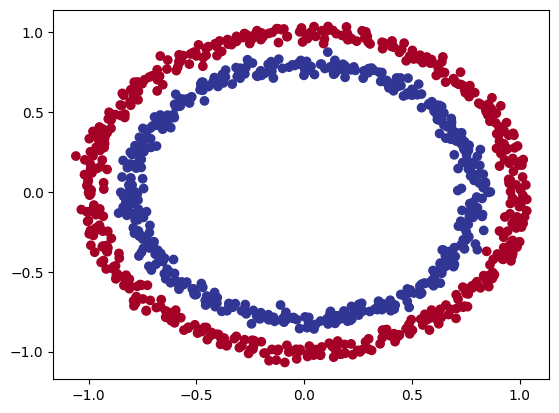

In [ ]:
# Visualize.

import matplotlib.pyplot as plt

plt.scatter(x = x[:,0],
            y = x[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

x = torch.tensor(x).type(torch.float)
y = torch.tensor(y).type(torch.float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu_layer = nn.ReLU() # relu is a non-linear activation function.

  def forward(self, x):
    return self.layer_3(self.relu_layer(self.layer_2(self.relu_layer(self.layer_1(x)))))

model_V2 = CircleModelV2().to(device)
model_V2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu_layer): ReLU()
)

In [ ]:
loss_fn_2 = nn.BCEWithLogitsLoss()
optimizer_2 = torch.optim.SGD(params = model_V2.parameters(), lr = 0.1)

In [ ]:
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed(42)

X_train, y_train = x_train.to(device), y_train.to(device)
X_test, y_test = x_test.to(device), y_test.to(device)

# Training and Testing loop.

epochs = 1000

for epoch in range(epochs):
  # Training...
  model_V2.to(device).train()

  y_logits = model_V2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn_2(y_logits, y_train)
  acc = accuracy(y_true = y_train, y_pred = y_pred )
  optimizer_2.zero_grad()

  loss.backward()
  optimizer_2.step()

  # Testing...
  with torch.inference_mode():
    test_logits = model_V2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn_2(test_logits, y_test)
    test_acc = accuracy(y_true = y_test, y_pred = test_pred)

    if epoch % 100 == 0:
      print(f"Epoch :{epoch} | Loss :{loss:.5f} | Accuracy :{acc:.2f}% | Test Loss :{test_loss:.5f} | Test Accuracy :{test_acc:.2f}%")


Epoch :0 | Loss :0.69295 | Accuracy :50.00% | Test Loss :0.69319 | Test Accuracy :50.00%
Epoch :100 | Loss :0.69115 | Accuracy :52.88% | Test Loss :0.69102 | Test Accuracy :52.50%
Epoch :200 | Loss :0.68977 | Accuracy :53.37% | Test Loss :0.68940 | Test Accuracy :55.00%
Epoch :300 | Loss :0.68795 | Accuracy :53.00% | Test Loss :0.68723 | Test Accuracy :56.00%
Epoch :400 | Loss :0.68517 | Accuracy :52.75% | Test Loss :0.68411 | Test Accuracy :56.50%
Epoch :500 | Loss :0.68102 | Accuracy :52.75% | Test Loss :0.67941 | Test Accuracy :56.50%
Epoch :600 | Loss :0.67515 | Accuracy :54.50% | Test Loss :0.67285 | Test Accuracy :56.00%
Epoch :700 | Loss :0.66659 | Accuracy :58.38% | Test Loss :0.66322 | Test Accuracy :59.00%
Epoch :800 | Loss :0.65160 | Accuracy :64.00% | Test Loss :0.64757 | Test Accuracy :67.50%
Epoch :900 | Loss :0.62362 | Accuracy :74.00% | Test Loss :0.62145 | Test Accuracy :79.00%


In [ ]:
# Evaluatin the model.

model_V2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_V2(X_test))).squeeze()

print(y_preds[:10], y_test[:10])
print(y_preds[:10] == y_test[:10])


tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]) tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
tensor([ True,  True,  True,  True, False,  True,  True,  True,  True,  True])


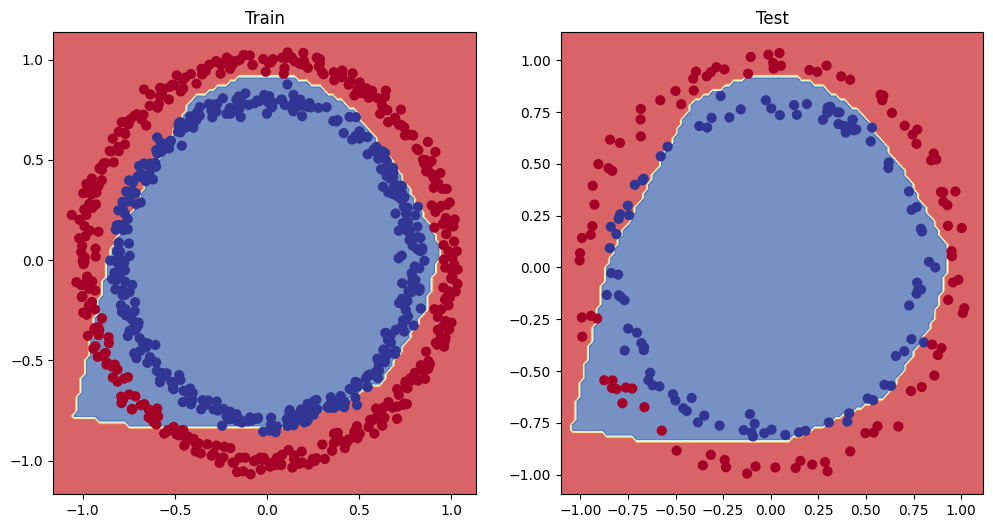

In [ ]:
# Let's Visualize...

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_V2, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_V2, X_test, y_test)

# Replicating the non-linear activation functions

In [ ]:
# Create a tensor.
import torch

A = torch.arange(-10, 10, 1.)
A.dtype

torch.float32

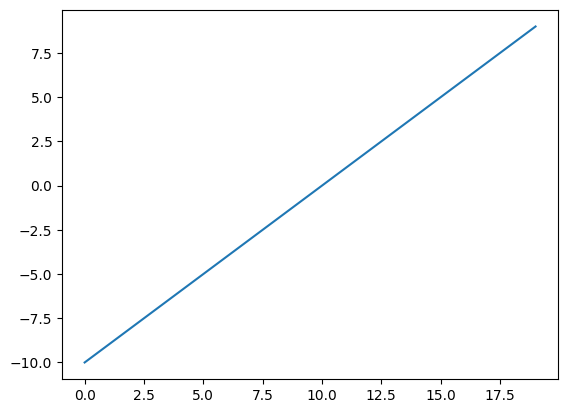

In [ ]:
plt.plot(A); # ; is used to avoid the memory of the plot.

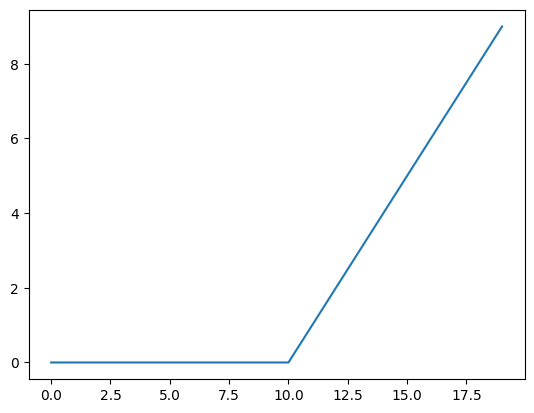

In [ ]:
plt.plot(torch.relu(A));

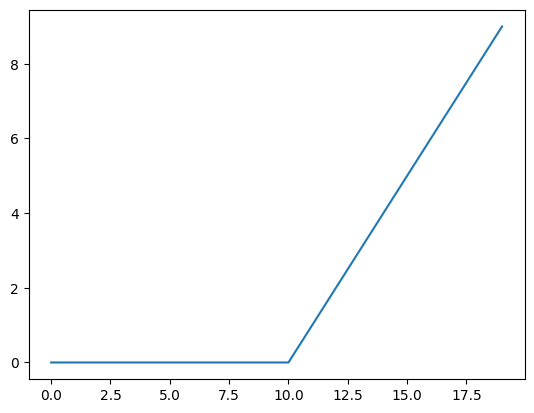

In [ ]:
def relu(x: torch.tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

plt.plot(relu(A));

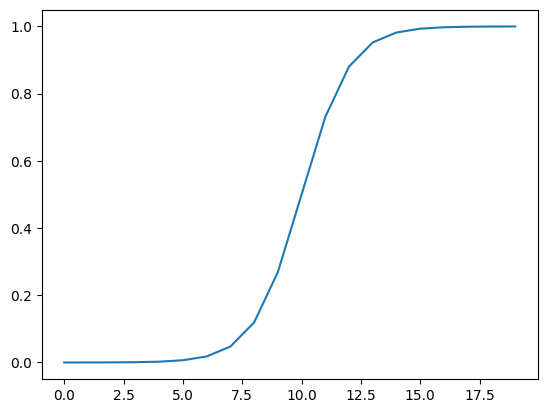

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A));

# Multiclass Classification

In [ ]:
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# Importing dependencies

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setting the hypher parameters to crreating datasets.

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000, n_features = NUM_FEATURES, centers = NUM_CLASSES, cluster_std = 1.5, random_state = RANDOM_SEED)
X_blob.dtype, y_blob.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
# Turn data into tensors.
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)
X_blob.dtype, y_blob.dtype

(torch.float32, torch.float32)

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state = 42)

In [ ]:
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

X_blob_train.device, X_blob_test.device, y_blob_train.device, y_blob_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

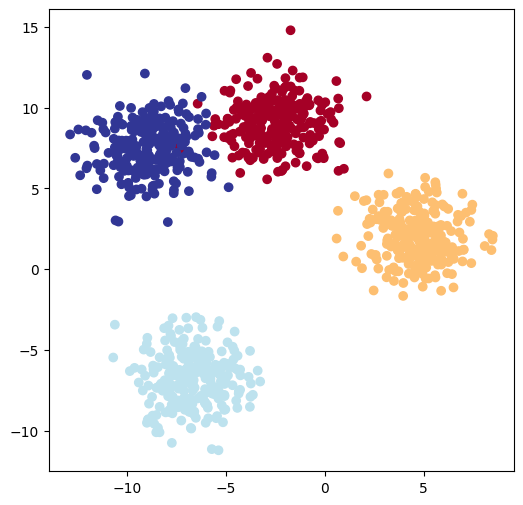

In [ ]:
# Visualize...

plt.figure(figsize = (6, 6))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu);

In [ ]:
X_blob_train.shape[1], len(torch.unique(y_blob_train))

(2, 4)

In [ ]:
class BlobeModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """
    Initializing the Mulitcalss Classification model.

  Args :-
    input_features :- No. of input feature to the model.
    output+_features :- No. of ouput features(number of output classes).
    hidden layers :- No:- of hidden units between the layer
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

blobe_model = BlobeModel(input_features = X_blob_train.shape[1], output_features = len(torch.unique(y_blob_train)), hidden_units = 8).to(device)
blobe_model

BlobeModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
print(next(blobe_model.parameters()).device)

cpu


In [ ]:
# Create a loss function and optimizer for thr multi-class classification model.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = blobe_model.parameters(), lr = 0.1)

## Manual Prediction(Train data).

* logits(raw output) -> prediction probablities -> prediction labels

In [ ]:
blobe_model.eval()
with torch.inference_mode():
  y_logits = blobe_model(X_blob_train.to(device))

y_logits[:10]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923],
        [-0.2044, -1.1380, -0.9468, -0.3093],
        [-0.2613, -1.2852, -1.0251, -0.2935],
        [-0.5237, -0.5791, -1.1276, -0.8689],
        [-0.0423, -0.8228, -0.4666, -0.0986],
        [-0.1876, -1.1245, -0.8498, -0.2406]])

* `Softmax` -> It is a function which calculates the sum of the prediction probabalities which gives the output as `1`

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

tensor([[0.3080, 0.3328, 0.1441, 0.2150],
        [0.3577, 0.1324, 0.1696, 0.3402],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3000, 0.1845, 0.2743, 0.2413],
        [0.3424, 0.1450, 0.1936, 0.3190]])

In [ ]:
for i in range(0, 10):
  print(torch.argmax(y_pred_probs[i]))

tensor(1)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)
tensor(0)


In [ ]:
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10] # Predicted labels.

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_preds[:10] == y_blob_test[:10]

tensor([ True, False, False, False,  True, False, False,  True, False,  True])

In [ ]:
print(y_logits.dtype, y_blob_train.dtype)

torch.float32 torch.float32


In [ ]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## Programatic Prediction

In [ ]:
# Training and Testing loop.

torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed(42)
  print(device)

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


for epoch in range(epochs):
  # Training...
  blobe_model.train()

  y_logits = blobe_model(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train.type(torch.LongTensor).to(device))
  acc = accuracy(y_true = y_blob_train, y_pred = y_pred)
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # Testing...

  blobe_model.eval()
  with torch.inference_mode():
    test_logits = blobe_model(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test.type(torch.LongTensor).to(device))
    test_acc = accuracy(y_true = y_blob_test, y_pred = test_pred)

    if epoch % 100 == 0:
      print(f"Epoch :{epoch} | Loss :{loss:.5f} | Accuracy :{acc:.2f}% | Test Loss :{test_loss:.5f} | Test Accuracy :{test_acc:.2f}%")




Epoch :0 | Loss :1.15883 | Accuracy :40.38% | Test Loss :1.07554 | Test Accuracy :48.00%
Epoch :100 | Loss :0.03312 | Accuracy :99.25% | Test Loss :0.02433 | Test Accuracy :99.50%
Epoch :200 | Loss :0.02657 | Accuracy :99.25% | Test Loss :0.01651 | Test Accuracy :99.50%
Epoch :300 | Loss :0.02503 | Accuracy :99.25% | Test Loss :0.01440 | Test Accuracy :99.50%
Epoch :400 | Loss :0.02427 | Accuracy :99.25% | Test Loss :0.01335 | Test Accuracy :99.50%
Epoch :500 | Loss :0.02377 | Accuracy :99.25% | Test Loss :0.01269 | Test Accuracy :99.50%
Epoch :600 | Loss :0.02339 | Accuracy :99.25% | Test Loss :0.01218 | Test Accuracy :99.50%
Epoch :700 | Loss :0.02307 | Accuracy :99.25% | Test Loss :0.01179 | Test Accuracy :99.50%
Epoch :800 | Loss :0.02279 | Accuracy :99.25% | Test Loss :0.01147 | Test Accuracy :99.50%
Epoch :900 | Loss :0.02253 | Accuracy :99.25% | Test Loss :0.01120 | Test Accuracy :99.50%


## Manual Prediction with loss function and optimizer.

In [ ]:
with torch.inference_mode():
  y_logits = blobe_model(X_blob_test)

y_logits[:10]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8975, -12.3324,  -8.4675],
        [ -2.7723, -11.1927,  -7.4741,   6.3901],
        [ -4.3608,  -4.5814,   4.6891,  -3.5910],
        [  5.8017,  -6.8308,  -9.7351,  -4.1265],
        [ -6.3789,  -6.9228,   6.6639,  -5.5251],
        [  6.2822,  -5.5357, -10.3558,  -5.4748]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[1.6515e-06, 1.0000e+00, 6.5754e-10, 2.1385e-10],
        [5.9742e-04, 4.0741e-07, 9.7747e-06, 9.9939e-01],
        [3.1371e-05, 2.1165e-05, 9.9989e-01, 6.1552e-05],
        [1.3729e-05, 9.9998e-01, 1.1796e-06, 3.5901e-07],
        [9.9992e-01, 8.3726e-05, 6.6887e-09, 3.1906e-07],
        [1.0490e-04, 2.3112e-08, 9.5245e-07, 9.9989e-01],
        [1.1735e-04, 9.4120e-05, 9.9954e-01, 2.5340e-04],
        [9.9995e-01, 3.2638e-06, 1.7882e-07, 4.8777e-05],
        [2.1657e-06, 1.2571e-06, 9.9999e-01, 5.0863e-06],
        [9.9998e-01, 7.3709e-06, 5.9454e-08, 7.8339e-06]])

In [ ]:
y_pred = torch.argmax(y_pred_probs, dim = 1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [ ]:
y_pred[:10] == y_blob_test[:10]

tensor([True, True, True, True, True, True, True, True, True, True])

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('File is already exist!')

else:
  print('downloading....')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

File is already exist!


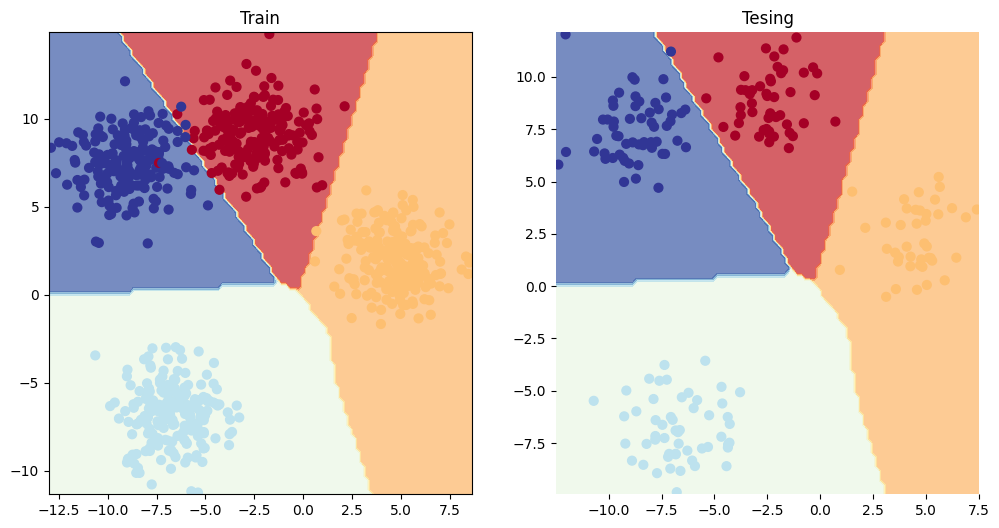

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(blobe_model, X_blob_train, y_blob_train)

plt.subplot(1, 2, 2)
plt.title('Tesing')
plot_decision_boundary(blobe_model, X_blob_test, y_blob_test)
plt.box(False)

## Few more classification metrics(to evaluate metrics).

*  Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification report

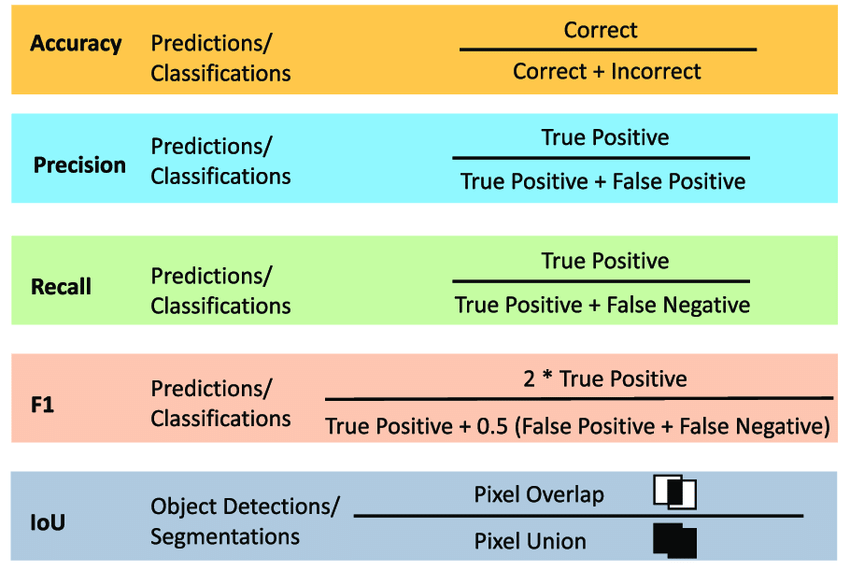


# Torch Mertrics

In [ ]:
# ! pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task = 'multiclass', num_classes = len(torch.unique(y_blob_train))).to(device) # We need to assign task to find the accuracy(In this case, problem is multi-class classification -> task ).
torchmetric_accuracy(y_pred, y_blob_test)

tensor(0.9950)

# PyTorch Computer Vision

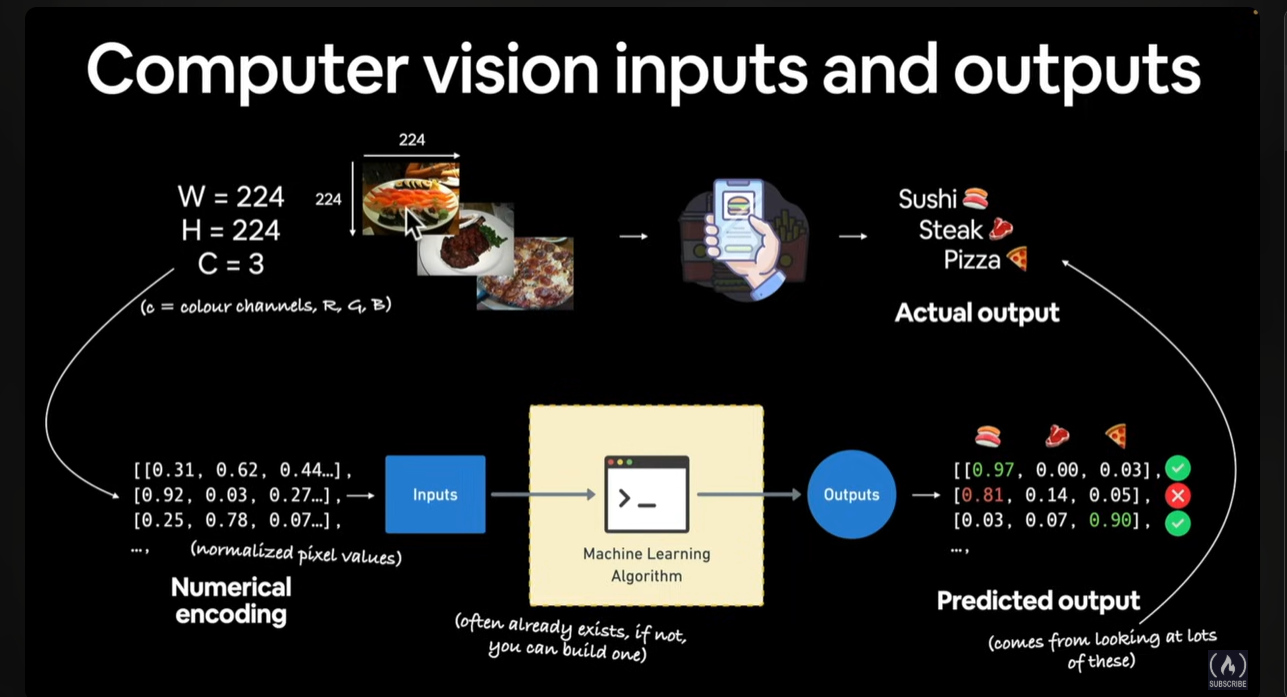

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# Getting the dataset.

train_data = datasets.FashionMNIST(
    root = 'data', # where to download the data.
    train = True, # Do we want the training datasets?
    download = True, # Do we want the download the datasets?
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(), # convert thr PIL image or ndarray into tensor.
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.67MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 2.43MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# Getting the class names along withi its index.
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of the image.
print(f'Image shape :{image.shape} -> [Color channel, Height, Width]')
print(f'Image Labes :{class_names[label]}')

Image shape :torch.Size([1, 28, 28]) -> [Color channel, Height, Width]
Image Labes :Ankle boot


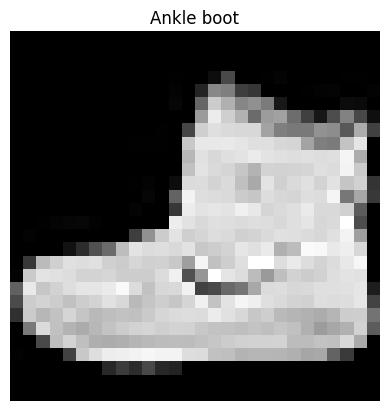

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray');
plt.title(class_names[label]);
plt.axis(False);

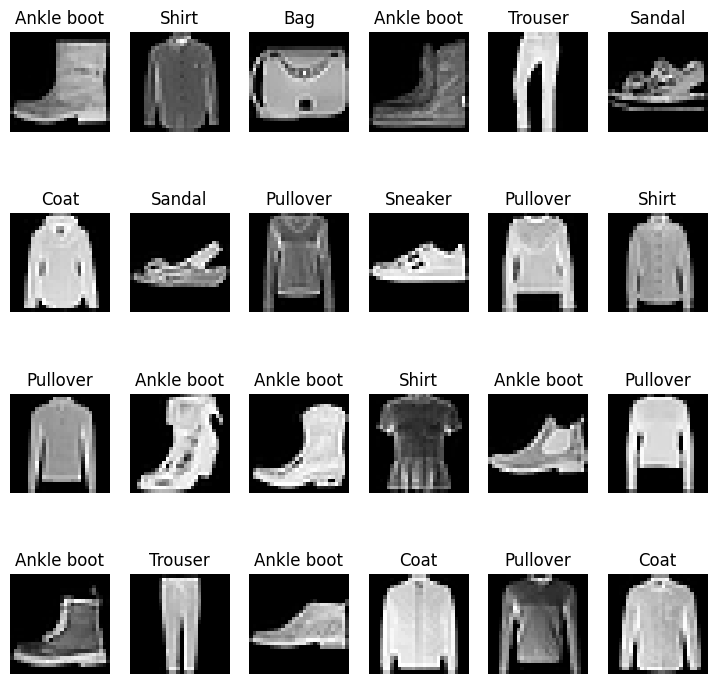

In [ ]:
# Visaulizing the data.
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed(42)

fig = plt.figure(figsize = (9, 9))
row, col = 4, 6

for i in range(1, row*col + 1):
  row_idx = torch.randint(0, len(train_data), size = [1]).item() # this line generates the random integer in the range of lenght of the images.
  image, label = train_data[row_idx] # from the generated rand int it gets image and its the label.
  fig.add_subplot(row, col, i)
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
# Create DataLoader.
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=32,
                             shuffle=False)

print(len(train_dataloader), len(test_dataloader))

1875 313


In [ ]:
train_feature_batch, train_label_batch = next(iter(train_dataloader))
print(len(train_feature_batch), len(train_label_batch))
print(train_feature_batch.shape, train_label_batch.shape)

32 32
torch.Size([32, 1, 28, 28]) torch.Size([32])


Shape of the Image :torch.Size([1, 28, 28])


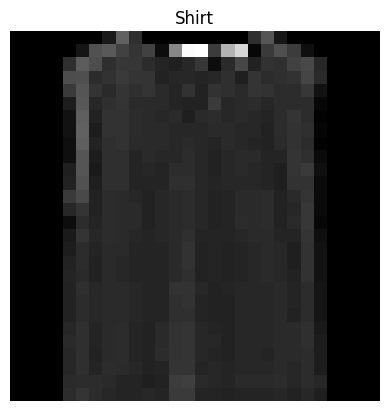

In [ ]:
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed(42)

rand_idx = torch.randint(0, len(train_feature_batch), size = [1]).item()
image, label = train_feature_batch[rand_idx], train_label_batch[rand_idx]
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False);

print(f'Shape of the Image :{image.shape}')

## Model Building

In [ ]:
# Create a flatten layer.

flatten_model = nn.Flatten()

x = train_feature_batch[0] # -> Shape :- [Color channel, Height, Width]

output = flatten_model(x) # -> Shape :- [Color channel, Height*Width]
x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [ ]:
class FashionMnistModel(nn.Module):
  def __init__(self,
               input_shape : int,
               output_shape : int,
               hidden_units : int):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                    out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                    out_features = output_shape)
    )

  def  forward(self, x):
    return self.linear_stack(x)

In [ ]:
if device == 'cuda':
  torch.cuda.manual_seed(42)
  print(device)

else:
  torch.manual_seed(42)
  print(device)

model_0 = FashionMnistModel(
    input_shape = torch.prod(torch.tensor(train_feature_batch.shape[2:])).item(), # This is last two dimension shape of the train_feature_batch.
    output_shape = len(class_names),
    hidden_units = 10
).to(device)
model_0

cpu


FashionMnistModel(
  (linear_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_0.linear_stack[1].weight.device

device(type='cpu')

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('linear_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('linear_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

## Model training

In [ ]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
# Setup loss, optimizer, and evaluation metrics.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start : float,
                     end : float,
                     device : torch.device = None):
  total_time = end - start
  print(f'Total time taken for training on the {device} : {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()

end_time = timer()
print_train_time(start = start_time, end = end_time, device = device)

Total time taken for training on the cpu : 0.000 seconds


4.694900002277791e-05

In [ ]:
# Training and Testing loop.

from tqdm.auto import tqdm # import tqdm for progress bar.

if device == 'cuda':
  torch.cuda.manual_seed(42)

else:
  torch.manual_seed(42)

train_start_time_on_device = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch : {epoch + 1}\n---------')

  # Training...
  training_loss = 0

  # Add a loop to loop through the training batches.
  for batch , (X, y) in enumerate(train_dataloader): # enumerate() adds an index counter to an iterable and returns an (index, value) tuple for each element.
    model_0.train()

    # Forward pass
    y_pred = model_0(X)

    # Calculate the loss(per batch).
    loss = loss_fn(y_pred, y)
    training_loss += loss

    # Optimizer.
    optimizer.zero_grad()

    # Loss backward.
    loss.backward()

    # Optimizer step
    optimizer.step()

    # What's happing inside.
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  training_loss /= len(train_dataloader)

  # Testing...
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      # Forward pass
      test_pred = model_0(X_test)

      # Calculating loss
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # Calculate loss(per batch)
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'\nTrain Loss :{training_loss:.4f} | Testing Loss : {test_loss:.4f} | Testing Accuracy : {test_acc:.4f}')

train_end_time_on_device = timer()
total_time_of_model_0 = print_train_time(start = train_start_time_on_device,
                                         end = train_end_time_on_device,
                                         device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss :0.5904 | Testing Loss : 0.5095 | Testing Accuracy : 82.0387
Epoch : 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss :0.4763 | Testing Loss : 0.4799 | Testing Accuracy : 83.1969
Epoch : 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss :0.4550 | Testing Loss : 0.4766 | Testing Accuracy : 83.4265
Total time taken for training on the cpu : 33.239 seconds
